# Effecient Frontier

In [1]:
import pandas as pd
import numpy as np
import risk_kt as rk
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from IPython.display import display
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ind = rk.get_ind_returns()

In [3]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


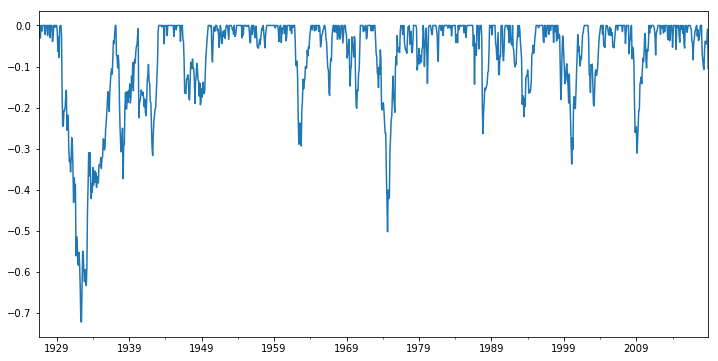

In [4]:
rk.drawdown(ind["Food"])["drawdown"].plot(figsize = (12,6))

In [5]:
rk.var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]], level = 5)

Food     0.068226
Smoke    0.084150
Coal     0.167033
Beer     0.106206
Fin      0.101333
dtype: float64

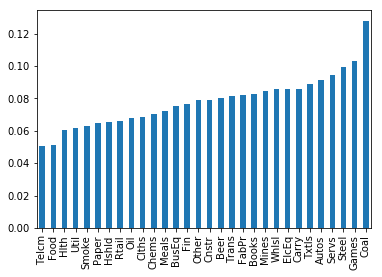

In [6]:
rk.var_gaussian(ind, level = 10).sort_values().plot(kind= "bar")

In [7]:
def annualized_rets(r:pd.Series, periods_per_year):
    
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods) - 1;

def annualized_vol(r:pd.Series, periods_per_year):
    
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, risk_free_rate, periods_per_year):
    """
    Takes annual risk_free_rate
    Returns Sharpe Ratio
    """
    #Converting annual risk_free_rate to per period
    risk_free_rate_period = (1+risk_free_rate)**(1/periods_per_year) - 1
    excess_rate = r - risk_free_rate_period 
    annualized_return = annualized_rets(excess_rate, periods_per_year)
    annualizez_volatility = annualized_vol(r, periods_per_year)
    
    return annualized_return/annualizez_volatility

In [8]:
sharpe_ratio(ind["Food"], risk_free_rate= 0.05, periods_per_year= 12)

0.3300433585996066

In [9]:
n_periods = ind["Food"].shape[0]

In [10]:
n_periods

1110

In [11]:
def sharpe_ratio1(r, risk_free_rate, periods_per_year):
    """
    Takes annual risk_free_rate
    Returns Sharpe Ratio
    """
    #Converting annual risk_free_rate to per period
    annualized_return = annualized_rets(r, periods_per_year)
    annualizez_volatility = annualized_vol(r, periods_per_year)
    
    return (annualized_return-risk_free_rate)/annualizez_volatility

In [12]:
sharpe_ratio1(ind["Food"], risk_free_rate = 0.05, periods_per_year = 12)

0.34547602697440677

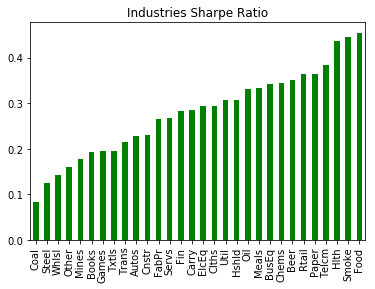

In [13]:
rk.sharpe_ratio(ind, risk_free_rate = 0.03, periods_per_year = 12).sort_values().plot(kind = "bar", 
                                                                                      title = "Industries Sharpe Ratio",
                                                                                     color = "green")

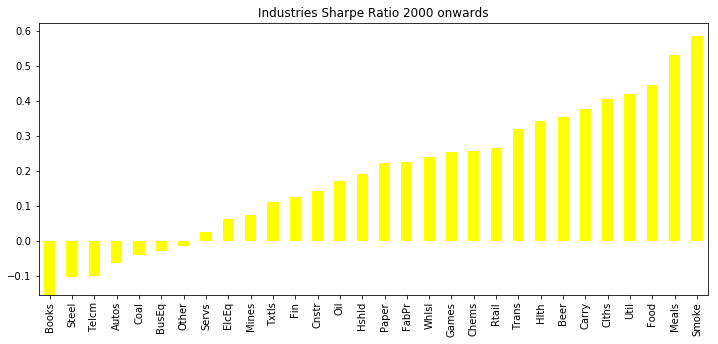

In [14]:
rk.sharpe_ratio(ind["2000":], risk_free_rate = 0.03, periods_per_year = 12).sort_values().plot(kind = "bar", 
                                                                                      title = "Industries Sharpe Ratio 2000 onwards",
                                                                                      color = "yellow",
                                                                                             figsize = (12,5)
                                                                                            )

In [15]:
expected_return = rk.annualized_rets(ind["1996":"2000"], periods_per_year=12)
cov = ind["1996":"2000"].cov()

In [16]:
l = ["Food", "Beer", "Smoke", "Coal"]
expected_return[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [17]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [18]:
weights = np.repeat(1/4, 4)

In [19]:
weights

array([ 0.25,  0.25,  0.25,  0.25])

## 2 Asset Frontier

In [20]:
l = ["Games", "Fin"]

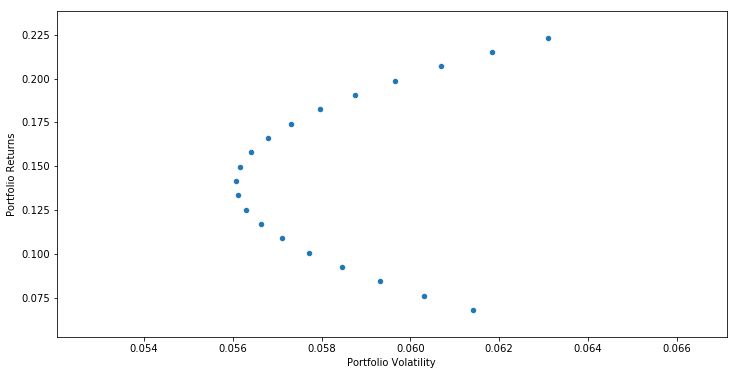

In [21]:
rk.plot_ef2(n_points=20, expected_returns=expected_return[l], cov_mat = cov.loc[l,l])

## N Asset Frontier

```python
def plot_ef(n_points, exptd_rets, cov_mat):
    
    """
    Plot N Asset Effecient Frontier
    """
    weights = ???????
    
    portfolio_rets = [portfolio_return(weights=w, returns= exptd_rets) for w in weights]
    portfolio_vol = [portfolio_volatility(weights=w, covmat = cov_mat) for w in weights]
    
    ef = pd.DataFrame({"Portfolio Returns": portfolio_rets, "Portfolio Volatility": portfolio_vol})
    
    return ef.plot.scatter( x = "Portfolio Volatility", y = "Portfolio Returns", style = "-", figsize = (12, 6))
```    

In [22]:
l = ["Smoke", "Games", "Fin", "Coal"]

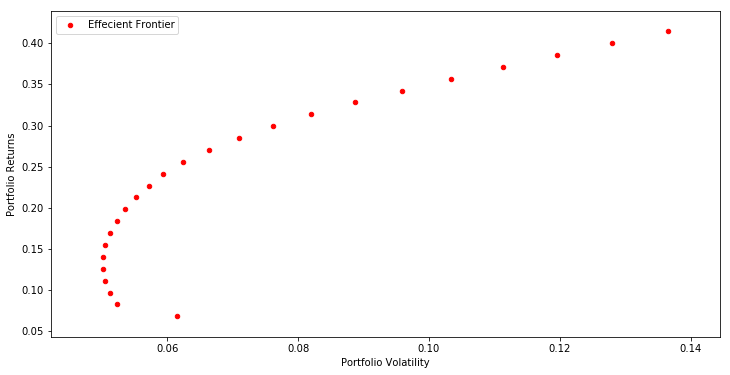

In [23]:
data, plot  = rk.plot_ef(n_points= 25, expected_returns=expected_return[l], cov_mat = cov.loc[l,l])

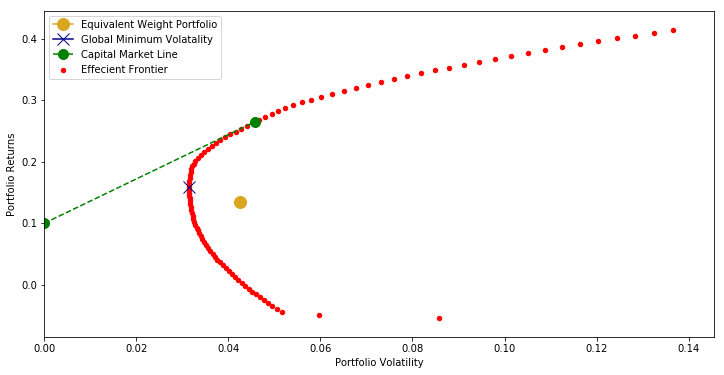

In [24]:
rf = 0.1
data, ax = rk.plot_ef(n_points  = 100, expected_returns = expected_return, cov_mat = cov, risk_free_rate= rf, 
                      show_cml= True, show_ew = True, show_gmv = True)
# ax.set_xlim(left = 0)

## Diversification fails you when you need them most

In [25]:
ind_returns = rk.get_ind_returns()
# Below data is the average size of 
ind_size = rk.get_ind_size()
ind_nfirms = rk.get_ind_nfirms()

In [26]:
ind_size.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94


In [27]:
ind_nfirms.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [28]:
ind_mkt_cap = ind_size * ind_nfirms

In [29]:
ind_mkt_cap.head()
total_mkt_cap = ind_mkt_cap.sum(axis = 1)

In [30]:
ind_weights = ind_mkt_cap.divide(total_mkt_cap, axis = "rows")

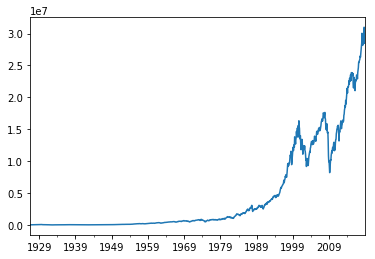

In [31]:
total_mkt_cap.plot()

In [32]:
ind_weights.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


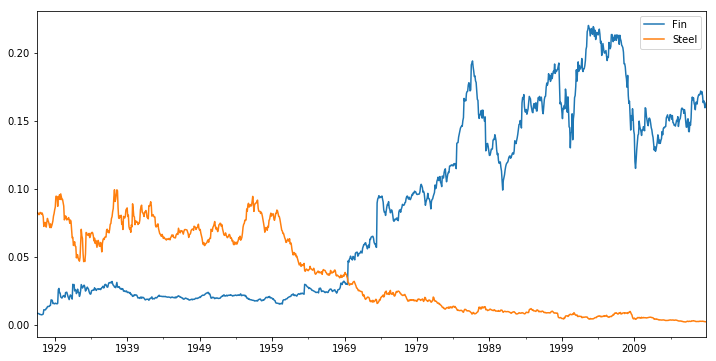

In [33]:
ind_weights[["Fin","Steel"]].plot(figsize = (12,6))

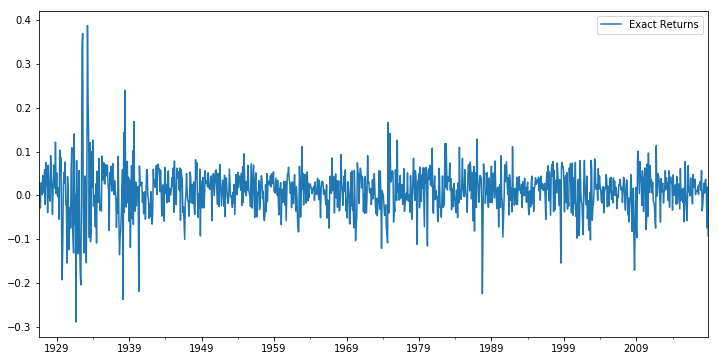

In [34]:
ind_total_rets = (ind_returns * ind_weights).sum(axis = 1)
ind_total_rets.plot(figsize = (12,6), label = "Exact Returns", legend = True)

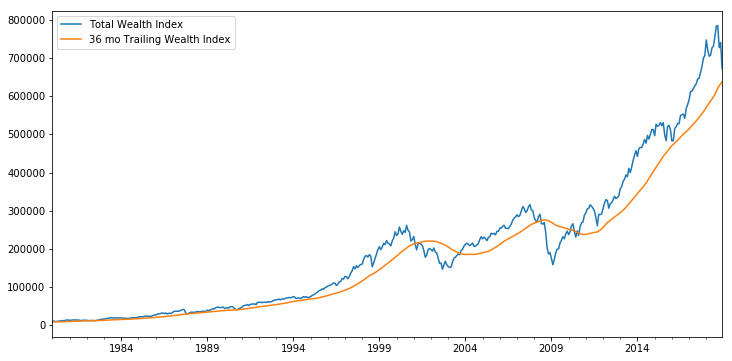

In [35]:
total_market_index = rk.drawdown(ind_total_rets)["wealth_values"]
tot_mkt_index_36mo = total_market_index.rolling(window = 36).mean()

total_market_index["1980":].plot(figsize = (12,6), label = "Total Wealth Index", legend = True)
tot_mkt_index_36mo["1980":].plot(figsize = (12,6), label = "36 mo Trailing Wealth Index", legend = True)


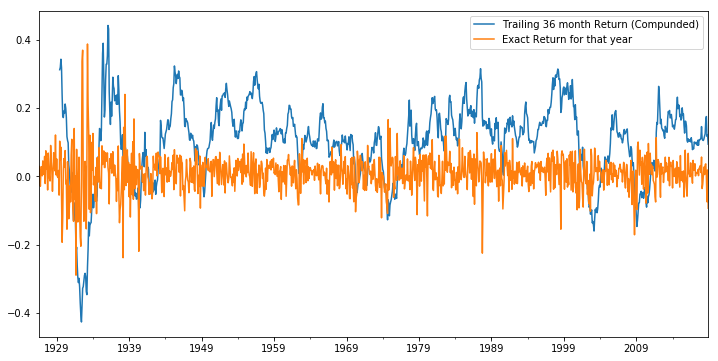

In [36]:
# Trailing 36 months reuturn
tmi_tr36rets = ind_total_rets.rolling(window = 36).aggregate(rk.annualized_rets, periods_per_year = 12)
tmi_tr36rets.plot(figsize = (12,6), label = "Trailing 36 month Return (Compunded)", legend  = True)
ind_total_rets.plot(figsize = (12,6), label = "Exact Return for that year", legend = True)

### Multi Indices, Correlation matrix

In [37]:
ind_rets_corr = ind_returns.rolling(window = 36).corr()

In [38]:
ind_rets_corr

<class 'pandas.core.panel.Panel'>
Dimensions: 1110 (items) x 30 (major_axis) x 30 (minor_axis)
Items axis: 1926-07 to 2018-12
Major_axis axis: Food to Other
Minor_axis axis: Food to Other

In [39]:
# ind_rets_co/zrr.to_excel("try.xlsx")

In [40]:
corr_mat = rk.panel_to_pandas(ind_rets_corr, index_name= "Year")

In [41]:
display(corr_mat.tail())

Food      Beer     Smoke     Games     Books     Hshld  \
Year    index                                                               
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls    ...        Telcm  \
Year    index                                            ...                
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197    ...     0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202    ...     0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726    ...     0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090    ...     0.420863   
        Other  0.467099  0.645035  0.712511  0.520953    ...     0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Year    index                                                               
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
Year    index                                
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [42]:
ind_tr36corr = corr_mat.groupby(level="Year").apply(lambda cor_mat: cor_mat.values.mean())

Correlation between trailing correlation and trailing returns:  -0.280100650629


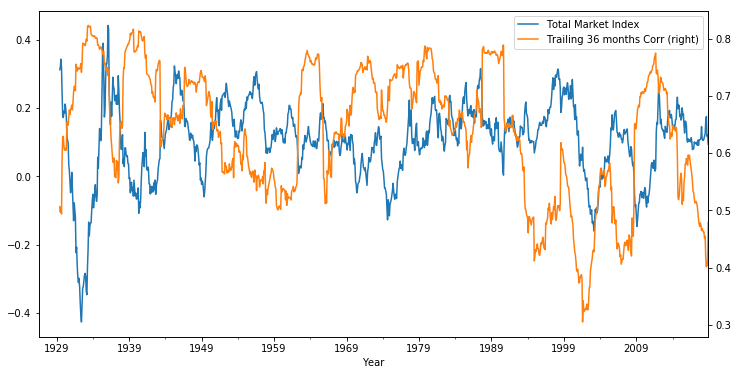

In [43]:
tmi_tr36rets.plot(label  = "Total Market Index", figsize = (12,6), legend = True)
ind_tr36corr.plot(label = "Trailing 36 months Corr", secondary_y= True, legend = True)

print("Correlation between trailing correlation and trailing returns: ", ind_tr36corr.corr(tmi_tr36rets))

Correlation between trailing correlation and trailing returns:  -0.280100650629


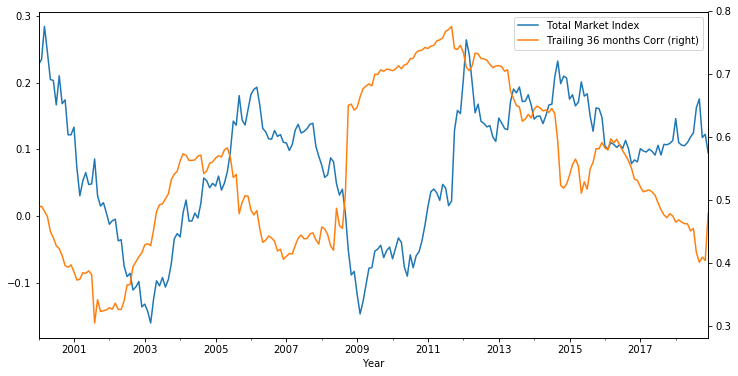

In [44]:
from_the_year = "2000"
tmi_tr36rets[from_the_year:].plot(label  = "Total Market Index", figsize = (12,6), legend = True)
ind_tr36corr[from_the_year:].plot(label = "Trailing 36 months Corr", secondary_y= True, legend = True)

print("Correlation between trailing correlation and trailing returns: ", ind_tr36corr.corr(tmi_tr36rets))

# CPPI strategy

In [45]:
total_ind_returns = rk.get_total_ind_returns()

In [46]:
rk.get_summary_stats(rets = ind_returns, risk_free_rate = 0.03, periods_per_year= 12)

,Annualized Returns,Annualized Volatility,Kurtosis,Maximum Drawdown,Sharpe Ratio,Skewness,VAR at 5%
Food,0.106649,0.163974,9.685942,-0.722186,0.454770,0.047090,0.068226
Beer,0.120041,0.248922,25.099855,-0.885744,0.351780,1.767094,0.106206
Smoke,0.122324,0.201206,6.238037,-0.598755,0.446361,0.003873,0.084150
Games,0.091829,0.308881,12.834406,-0.958661,0.194420,0.640702,0.135309
Books,0.079147,0.247850,9.542575,-0.915794,0.192686,0.505608,0.108740
Hshld,0.093513,0.200962,15.767173,-0.887100,0.307349,0.378634,0.086223
Clths,0.093518,0.210732,7.564461,-0.762776,0.293105,0.306152,0.090707
Hlth,0.116723,0.192703,9.655376,-0.746865,0.437783,0.082986,0.080671
Chems,0.107320,0.218022,9.389386,-0.859568,0.344903,0.307249,0.092979
Txtls,0.083356,0.265996,12.825371,-0.875844,0.194906,0.946878,0.116688


In [47]:
risky_returns = ind_returns["2000":][["Beer", "Fin", "Steel"]]
dates = risky_returns.index
n_steps = len(dates)

start = 1000
floor = 0.8
asset_worth = start
risk_free_returns = pd.DataFrame().reindex_like(risky_returns)
risk_free_returns[:] = 0.03/12
m = 3

asset_worth_history = pd.DataFrame().reindex_like(risky_returns)
risk_weight_history = pd.DataFrame().reindex_like(risky_returns)
cushion_history = pd.DataFrame().reindex_like(risky_returns)

verbose = False
for step in range(n_steps):
    floor_value = start*floor
    cushion = (asset_worth - floor_value)/asset_worth
    
    risky_weight = m*cushion
    risky_weight = np.minimum(1, risky_weight)
    risky_weight = np.maximum(0, risky_weight)
    risk_free_weight = 1 - risky_weight
    
    risky_alloc = risky_weight*asset_worth
    risk_free_alloc = risk_free_weight*asset_worth
    
    if verbose:
        print("Asset Worth:\n", asset_worth)
        print("Cusion  = ", cushion)
        print("Risky weight  = ", risky_weight)
        
    
    asset_worth = risky_alloc*(1+risky_returns.iloc[step]) + risk_free_alloc*(1+risk_free_returns.iloc[step])
    
    asset_worth_history.iloc[step] = asset_worth
    risk_weight_history.iloc[step] = risky_weight
    cushion_history.iloc[step] = cushion
    

risky_returns_worth = start*(1+risky_returns).cumprod()


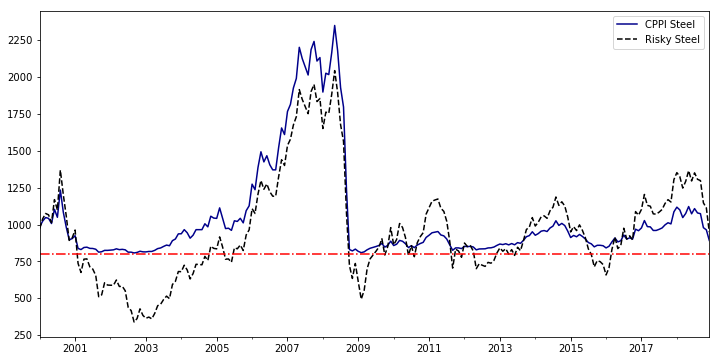

In [48]:
ax = asset_worth_history["Steel"].plot(color  = "darkblue", label = "CPPI Steel", legend = True, figsize = (12, 6))
risky_returns_worth["Steel"].plot(color = "k", style = "--", label = "Risky Steel", legend = True, ax =ax)
ax.axhline(floor_value, color = "red", linestyle ="-.")

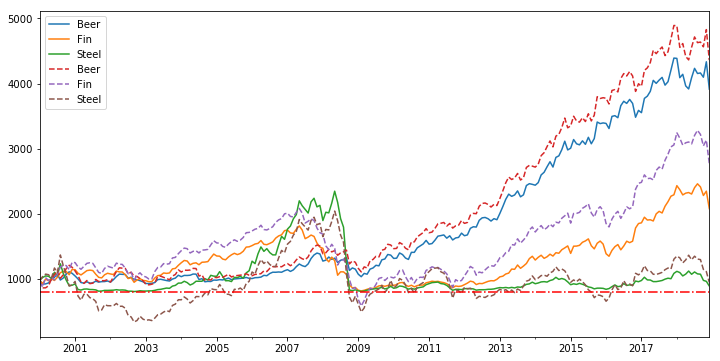

In [49]:
ax = asset_worth_history.plot( figsize = (12, 6))
risky_returns_worth.plot(ax =ax, style = "--")
ax.axhline(floor_value, color = "red", linestyle ="-.")

In [50]:
risky_returns = ind_returns["2000":][["Beer", "Fin", "Steel"]]
dates = risky_returns.index
n_steps = len(dates)

start = 1000
floor = 0.8
asset_worth, prev_peak = start, start
risk_free_returns = pd.DataFrame().reindex_like(risky_returns)
risk_free_returns[:] = 0.03/12
m = 3
max_drawdown = 0.4

asset_worth_history1 = pd.DataFrame().reindex_like(risky_returns)
risk_weight_history1 = pd.DataFrame().reindex_like(risky_returns)
cushion_history1 = pd.DataFrame().reindex_like(risky_returns)
floor_value_history = pd.DataFrame().reindex_like(risky_returns)

verbose = False
for step in range(n_steps):
    prev_peak = np.maximum(asset_worth, prev_peak)
    floor_value = prev_peak*floor
    cushion = (asset_worth - floor_value)/asset_worth
    
    risky_weight = m*cushion
    risky_weight = np.minimum(1, risky_weight)
    risky_weight = np.maximum(0, risky_weight)
    risk_free_weight = 1 - risky_weight
    
    risky_alloc = risky_weight*asset_worth
    risk_free_alloc = risk_free_weight*asset_worth
    
    if verbose:
        print("Asset Worth:\n", asset_worth)
        print("Cusion  = ", cushion)
        print("Risky weight  = ", risky_weight)
        
    
    asset_worth = risky_alloc*(1+risky_returns.iloc[step]) + risk_free_alloc*(1+risk_free_returns.iloc[step])
    
    asset_worth_history1.iloc[step] = asset_worth
    risk_weight_history1.iloc[step] = risky_weight
    cushion_history1.iloc[step] = cushion
    floor_value_history.iloc[step] = floor_value

risky_returns_worth1 = start*(1+risky_returns).cumprod()


,Annualized Returns,Annualized Volatility,Kurtosis,Maximum Drawdown,Sharpe Ratio,Skewness,VAR at 5%
Beer,0.075544,0.115462,4.760879,-0.259582,0.383772,-0.669250,0.048058
Fin,0.040894,0.131678,6.051414,-0.549673,0.080352,-0.946504,0.058304
Steel,-0.005167,0.174180,17.110190,-0.655198,-0.196750,-1.995143,0.081579


,Annualized Returns,Annualized Volatility,Kurtosis,Maximum Drawdown,Sharpe Ratio,Skewness,VAR at 5%
Beer,0.056568,0.072510,4.576511,-0.125096,0.356528,-0.746848,0.029539
Fin,0.052602,0.073573,3.768008,-0.193668,0.298912,-0.088573,0.030352
Steel,0.038389,0.097127,5.187552,-0.197943,0.083941,0.494924,0.042486


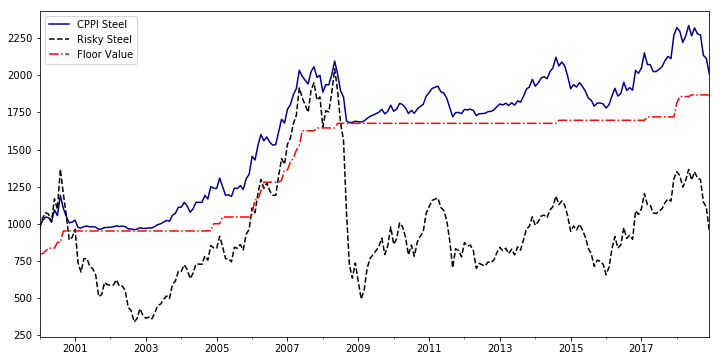

In [51]:
ax = asset_worth_history1["Steel"].plot(color  = "darkblue", label = "CPPI Steel", legend = True, figsize = (12, 6))
risky_returns_worth1["Steel"].plot(color = "k", style = "--", label = "Risky Steel", legend = True, ax =ax)
floor_value_history["Steel"].plot(ax =ax, color = "red", linestyle ="-.", label = "Floor Value", legend = True)

display(rk.get_summary_stats(rets = asset_worth_history.pct_change().dropna(), risk_free_rate= 0.03, periods_per_year= 12))

display(rk.get_summary_stats(rets = asset_worth_history1.pct_change().dropna(), risk_free_rate= 0.03, periods_per_year= 12))

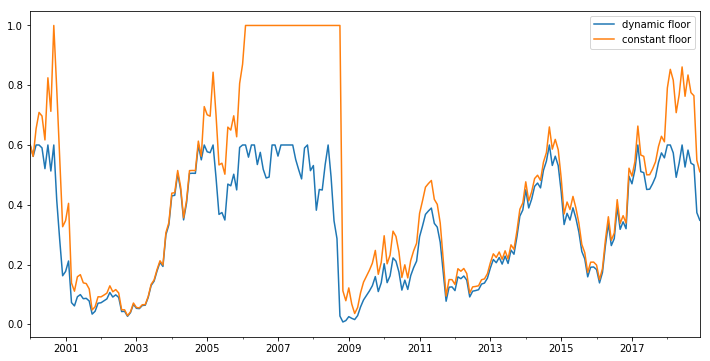

In [52]:
risk_weight_history1["Steel"].plot(figsize = (12,6), label = "dynamic floor", legend = True)
risk_weight_history["Steel"].plot(figsize = (12,6), label = "constant floor", legend = True)


In [53]:
import ipywidgets

In [54]:
a = pd.Series(data = [1,2,3,4,5], index=[1,2,3,4,5])

(1+0.1)**(a)

1    1.10000
2    1.21000
3    1.33100
4    1.46410
5    1.61051
dtype: float64

In [55]:
def gbm(n_years = 10, n_scenarios =1000, period_per_year = 12, mu = 0.03, sigma = 0.10):
    dt = 1/period_per_year
    n_rows = n_years*period_per_year
    return np.random.normal(loc = mu*dt, scale = sigma*(dt)**0.5, size=(n_rows, n_scenarios))

In [56]:
def show_gbm_wealth(n_years = 5, n_scenarios = 200, mu = 0.03, sigma = 0.10):
    x = gbm(n_years = n_years, n_scenarios =n_scenarios, period_per_year = 12, mu = mu, sigma = sigma)
    y  = pd.DataFrame(x)
    wealth  = y.apply(lambda r: rk.drawdown(r)["wealth_values"])
    wealth.iloc[0] = 100
    ax = wealth.plot(legend = False, color = "indianred", alpha = 0.4, figsize=(12, 6))
    ax.set_ylim(bottom = 0, top = 450)
    return ax

In [57]:
controls = widgets.interactive(show_gbm_wealth, 
                               n_years = widgets.IntSlider(min = 1,max = 10, step=1, value = 5), 
                               n_scenarios = widgets.IntSlider(min = 50, max = 1000, step=25, value = 200), 
                               mu = (0.01, 0.30, 0.01), 
                              sigma = (0.01, 0.30, 0.01))

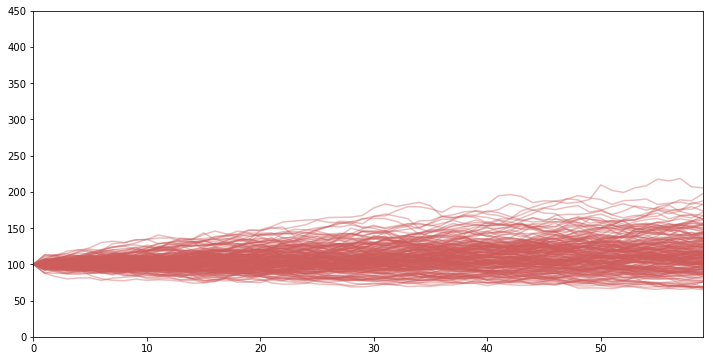

In [58]:
display(controls)

In [60]:
def cppi(risky_returns, floor = 0.8, riskfree_annual_rate = 0.03, m = 3, 
         dynamic_floor = False, max_drawdown = 0.4, verbose = False):
    
    dates = risky_returns.index
    n_steps = len(dates)

    start = 100
    asset_worth, prev_peak = start, start
    risk_free_returns = pd.DataFrame().reindex_like(risky_returns)
    risk_free_returns[:] = riskfree_annual_rate/12

    asset_worth_history = pd.DataFrame().reindex_like(risky_returns)
    risk_weight_history = pd.DataFrame().reindex_like(risky_returns)
    cushion_history = pd.DataFrame().reindex_like(risky_returns)
    floor_value_history = pd.DataFrame().reindex_like(risky_returns)

    for step in range(n_steps):
        
        if dynamic_floor:
            prev_peak = np.maximum(asset_worth, prev_peak)
            floor_value = prev_peak*floor
        else: 
            floor_value = start*floor
        cushion = (asset_worth - floor_value)/asset_worth

        risky_weight = m*cushion
        risky_weight = np.minimum(1, risky_weight)
        risky_weight = np.maximum(0, risky_weight)
        risk_free_weight = 1 - risky_weight

        risky_alloc = risky_weight*asset_worth
        risk_free_alloc = risk_free_weight*asset_worth

        if verbose:
            display("Asset Worth:\n", asset_worth)
            display("Cusion  = ", cushion)
            display("Risky weight  = ", risky_weight)


        asset_worth = risky_alloc*(1+risky_returns.iloc[step]) + risk_free_alloc*(1+risk_free_returns.iloc[step])

        asset_worth_history.iloc[step] = asset_worth
        risk_weight_history.iloc[step] = risky_weight
        cushion_history.iloc[step] = cushion
        floor_value_history.iloc[step] = floor_value
    
    asset_worth_history.iloc[0] = start
    risky_returns_worth = start*(1+risky_returns).cumprod()
        
    return {"Asset Value": asset_worth_history,
           "Floor Value": floor_value_history,
           "Cushion" : cushion_history,
           "Risk Weights": risk_weight_history,
           "No CPPI Asset Value": risky_returns_worth}


In [63]:
x = gbm()
cppi_data = cppi(pd.DataFrame(x))

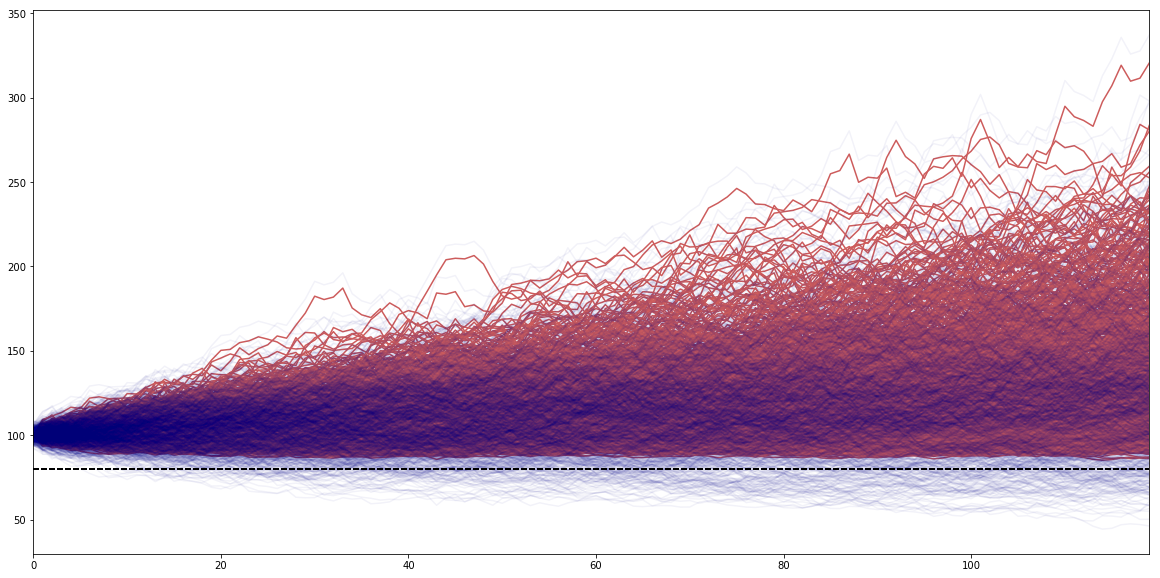

In [64]:
ax = cppi_data["Asset Value"].plot(legend = False, c = "indianred", figsize = (20,10))
cppi_data["No CPPI Asset Value"].plot(legend = False, color = "darkblue", alpha = 0.05, ax = ax)
cppi_data["Floor Value"].plot(legend = False, color = "k", style = "--", ax = ax)

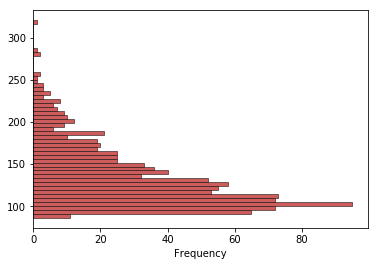

In [65]:
pd.DataFrame(cppi_data["Asset Value"].iloc[-1]).plot(kind = "hist", bins = 50, color = "indianred", orientation = "horizontal",
                                                    linewidth = 0.5, edgecolor = "black", legend = False)


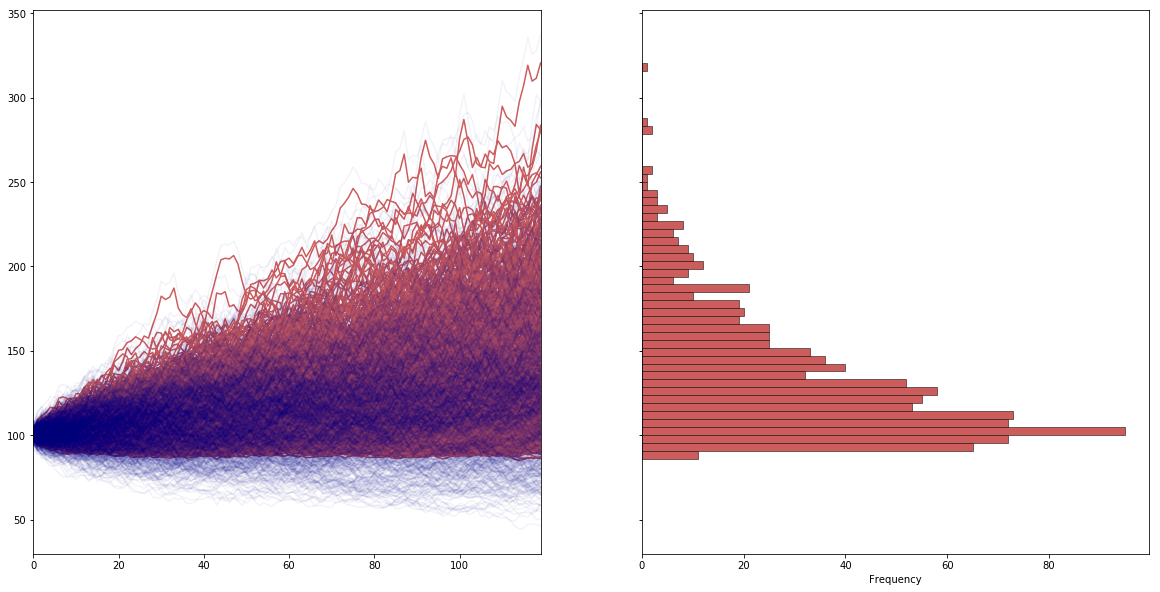

In [66]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(121)
cppi_data["Asset Value"].plot(legend = False, c = "indianred", figsize = (20,10), ax = ax1)
cppi_data["No CPPI Asset Value"].plot(legend = False, color = "darkblue", alpha = 0.05, ax = ax1)
# cppi_data["Floor Value"].plot(legend = False, color = "k", style = "--", ax = ax1)

ax2 = fig.add_subplot(122, sharey= ax1) 
pd.DataFrame(cppi_data["Asset Value"].iloc[-1]).plot(kind = "hist", bins = 50, color = "indianred", orientation = "horizontal",
                                                    linewidth = 0.5, edgecolor = "black", legend = False, ax = ax2)

In [191]:
def show_cppi(n_years = 5, n_scenarios = 100, mu = 0.03, sigma = 0.15, floor = 0.8, riskfree_annual_rate = 0.03, m = 3, 
              dynamic_floor = False, max_drawdown = 0.4):

    x = gbm(n_years = n_years, n_scenarios =n_scenarios, period_per_year = 12, mu = mu, sigma = sigma)
    y  = pd.DataFrame(x)
    cppi_data = cppi(y, floor = floor, riskfree_annual_rate = riskfree_annual_rate, m = m, 
                     dynamic_floor = dynamic_floor, max_drawdown = max_drawdown)
    
    #Terminal Wealth Status
    terminal_wealth = cppi_data["Asset Value"].iloc[-1]
    avg_wealth = np.average(terminal_wealth)
    median_wealth = np.median(terminal_wealth)
    failures = terminal_wealth < floor*100;
    n_failures = failures.sum()
    e_shortfall = np.dot(terminal_wealth - floor*100, failures)/n_failures if n_failures > 0 else 0.0

    fig = plt.figure(figsize= (20,10))
    gs1 = gridspec.GridSpec(1, 2)
    gs1.update(wspace=0, hspace=0)
    ax1 = fig.add_subplot(gs1[0])
    cppi_data["Asset Value"].plot(legend = False, c = "indianred", figsize = (20,10), ax = ax1, alpha = 0.5)
    # cppi_data["No CPPI Asset Value"].plot(legend = False, color = "darkblue", alpha = 0.05, ax = ax1)
    # cppi_data["Floor Value"].plot(legend = False, color = "k", style = "--", ax = ax1)
    
    ax1.set_ylim(bottom = 0, top = 450)
    ax2 = fig.add_subplot(gs1[1], sharey= ax1) 
    ax2.annotate(s = "Mean: ₹" + str(int(avg_wealth)), xy = (0.7, 0.9), xycoords = "axes fraction", fontsize = 20)
    ax2.annotate(s = "Median: ₹" + str(int(median_wealth)), xy = (0.7, 0.85), xycoords = "axes fraction", fontsize = 20)
    
    if floor > 0.01:
        ax2.annotate(s = "Total Violation: " + str(int(n_failures)), xy = (0.7, 0.8), xycoords = "axes fraction", fontsize = 20)
        ax2.annotate(f"E(Shortfall): ₹{e_shortfall:2.2f}", xy = (0.7, 0.75), xycoords = "axes fraction", fontsize = 20)
    
    
    pd.DataFrame(cppi_data["Asset Value"].iloc[-1]).plot(kind = "hist", bins = 50, color = "indianred", orientation = "horizontal",
                                                    linewidth = 0.5, edgecolor = "white", legend = False, ax = ax2)
    
    


In [194]:
controls2 = widgets.interactive(show_cppi, 
                               n_years = widgets.IntSlider(min = 1, max = 10, step = 1, value = 5, continuous_update = False), 
                               n_scenarios = widgets.IntSlider(min = 50, max  = 500, step = 20, value = 100, continuous_update = False),
                               mu = widgets.FloatSlider(min = 0.01, max = 0.30, step = 0.01, value = 0.07, continuous_update = False),
                               sigma = widgets.FloatSlider(min = 0.001, max = 0.50, step = 0.01, value = 0.10, continuous_update = False),
                               floor = widgets.FloatSlider(min = 0.0, max = 1, step = 0.01, value = 0.8, continuous_update = False), 
                               riskfree_annual_rate = widgets.FloatSlider(min = 0.0, max = 0.30, step = 0.01, value = 0.03, continuous_update = False), 
                               m = widgets.FloatSlider(min = 0.5, max = 5, step = 0.5, value = 3, continuous_update = False),
                               dynamic_floor = widgets.IntSlider(min = 0, max = 1, step = 1, value = 0, continuous_update = False),
                               max_drawdown = widgets.FloatSlider(min = 0, max = 0.5, step = 0.1, value = 0.01, continuous_update = False)
                               )

children  = controls2.children
# output.layout.height = '350px'

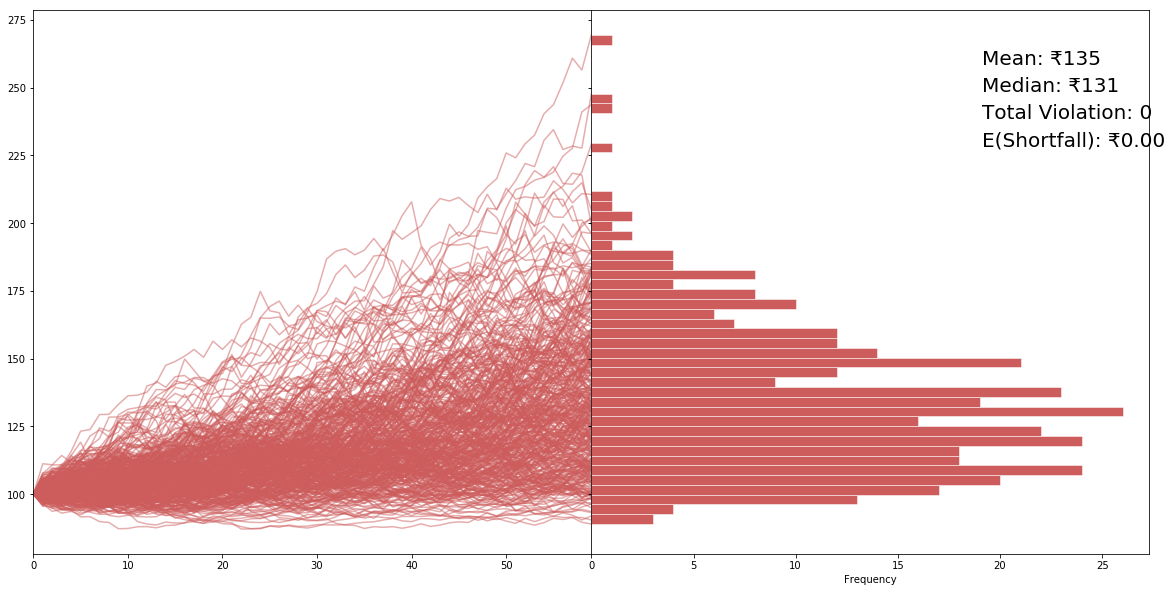

In [98]:
display(controls2)

In [102]:
len(children)

9

In [83]:
# import matplotlib.style as mplstyle
# # mplstyle.use('fast')

mpl.style.use(["seaborn-dark-palette"])

In [75]:
mpl.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

In [120]:
x = cppi(pd.DataFrame(gbm(mu = 0.07, sigma = 0.30)), floor = 0.99, m = 4)

In [165]:
condition = x["Asset Value"].iloc[-1] < 0.99*100

In [153]:
y = condition.apply(lambda r: r.value_counts())

In [167]:
condition.sum()

3

In [158]:
y

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
False,119,116,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,...,120.0,120.0,120.0,120.0,120.0,114,117,120.0,120.0,120.0
True,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6,3,NaN,NaN,NaN


In [2]:
k = pd.Series(index = [1,2,3,4,5,6], data = [2,5,7,4,2,3])

In [3]:
p = (k.values/(1 + 0.03)**(k.index.values))

In [4]:
p*(1+0.03)**k.index

Float64Index([1.94174757282, 9.62401852868,   19.86192137, 14.8194772224,
              9.05280105949, 15.9071982757],
             dtype='float64')

In [5]:
p.sum()

20.852337264438471

In [6]:
p[0]*(1.03)

2.0

In [8]:
def discount(t, r):
    return (1+r)**(-t)

In [21]:
def pv(liabilities, r):
    dates = liabilities.index.values
    discount_ = discount(dates, r)
    return np.dot(discount_, liabilities).sum()

In [24]:
def funding_ratio(asset, liabilities, r):
    return asset/pv(liabilities, r)

In [25]:
funding_ratio(23, k, 0.03)

1.1029938614710664